In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import os
import numpy as np
import matplotlib.pyplot as plt

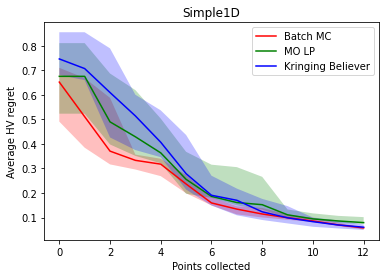

BatchMC avg time per optimization: 19.2019s
MO LP avg time per optimization: 11.3534s
KB avg time per optimization: 29.5378s


In [25]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")
mo_lp_hv_regret = np.loadtxt("results/DistanceBased_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")
mo_lp_time = np.loadtxt("results/DistanceBased_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Simple1D_n_initial_points_3_n_query_points_4_n_optimization_steps_3_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 3

x = range(n_query_points * n_optimization_steps + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.fill_between(x, np.quantile(kb_hv_regret, q=0.25, axis=0), np.quantile(kb_hv_regret, q=0.75, axis=0), facecolor='b', alpha=0.25)
plt.plot(x, np.median(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.median(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.plot(x, np.median(kb_hv_regret, axis=0), c='b', label='Kringing Believer')
plt.title("Simple1D")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

print(f"BatchMC avg time per optimization: {np.mean(batch_mc_time):.4f}s")
print(f"MO LP avg time per optimization: {np.mean(mo_lp_time):.4f}s")
print(f"KB avg time per optimization: {np.mean(kb_time):.4f}s")

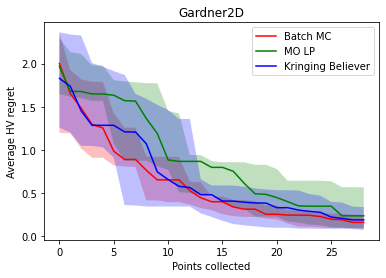

BatchMC avg time per optimization: 99.7349s
MO LP avg time per optimization: 17.7342s
KB avg time per optimization: 50.7328s


In [24]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
mo_lp_hv_regret = np.loadtxt("results/DistanceBased_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
mo_lp_time = np.loadtxt("results/DistanceBased_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Gardner2D_n_initial_points_3_n_query_points_4_n_optimization_steps_7_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 7

x = range(n_query_points * n_optimization_steps + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.fill_between(x, np.quantile(kb_hv_regret, q=0.25, axis=0), np.quantile(kb_hv_regret, q=0.75, axis=0), facecolor='b', alpha=0.25)
plt.plot(x, np.median(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.median(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.plot(x, np.median(kb_hv_regret, axis=0), c='b', label='Kringing Believer')
plt.title("Gardner2D")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

print(f"BatchMC avg time per optimization: {np.mean(batch_mc_time):.4f}s")
print(f"MO LP avg time per optimization: {np.mean(mo_lp_time):.4f}s")
print(f"KB avg time per optimization: {np.mean(kb_time):.4f}s")

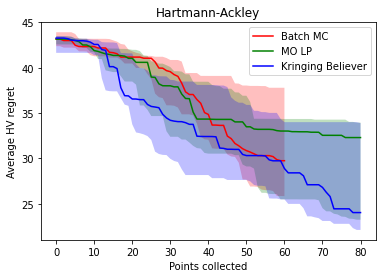

BatchMC avg time per optimization: 1219.7371s
MO LP avg time per optimization: 91.7236s
KB avg time per optimization: 234.9712s


In [23]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_Hartmann-Ackley_n_initial_points_3_n_query_points_4_n_optimization_steps_15_n_repeats_10_seed_None", delimiter=",")
mo_lp_hv_regret = np.loadtxt("results/DistanceBased_Hartmann-Ackley_n_initial_points_3_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_Hartmann-Ackley_n_initial_points_3_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_Hartmann-Ackley_n_initial_points_3_n_query_points_4_n_optimization_steps_15_n_repeats_10_seed_None_time", delimiter=",")
mo_lp_time = np.loadtxt("results/DistanceBased_Hartmann-Ackley_n_initial_points_3_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_Hartmann-Ackley_n_initial_points_3_n_query_points_4_n_optimization_steps_20_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 20

x = range(n_query_points * n_optimization_steps + 1)

plt.fill_between(x[:15*4+1], np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.fill_between(x, np.quantile(kb_hv_regret, q=0.25, axis=0), np.quantile(kb_hv_regret, q=0.75, axis=0), facecolor='b', alpha=0.25)
plt.plot(x[:15*4+1], np.median(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.median(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.plot(x, np.median(kb_hv_regret, axis=0), c='b', label='Kringing Believer')
plt.title("Hartmann-Ackley")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

print(f"BatchMC avg time per optimization: {np.mean(batch_mc_time):.4f}s")
print(f"MO LP avg time per optimization: {np.mean(mo_lp_time):.4f}s")
print(f"KB avg time per optimization: {np.mean(kb_time):.4f}s")

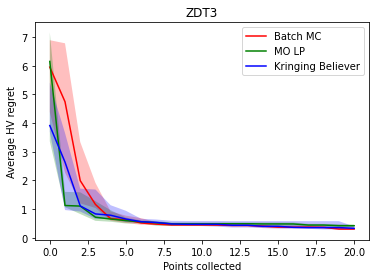

BatchMC avg time per optimization: 97.1872s
MO LP avg time per optimization: 15.3580s
KB avg time per optimization: 39.0330s


In [26]:
batch_mc_hv_regret = np.loadtxt("results/BatchMC_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
mo_lp_hv_regret = np.loadtxt("results/DistanceBased_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None", delimiter=",")

batch_mc_time = np.loadtxt("results/BatchMC_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
mo_lp_time = np.loadtxt("results/DistanceBased_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_ZDT3_n_initial_points_3_n_query_points_4_n_optimization_steps_5_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 5

x = range(n_query_points * n_optimization_steps + 1)

plt.fill_between(x, np.quantile(batch_mc_hv_regret, q=0.25, axis=0), np.quantile(batch_mc_hv_regret, q=0.75, axis=0), facecolor='r', alpha=0.25)
plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.fill_between(x, np.quantile(kb_hv_regret, q=0.25, axis=0), np.quantile(kb_hv_regret, q=0.75, axis=0), facecolor='b', alpha=0.25)
plt.plot(x, np.median(batch_mc_hv_regret, axis=0), c='r', label='Batch MC')
plt.plot(x, np.median(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.plot(x, np.median(kb_hv_regret, axis=0), c='b', label='Kringing Believer')
plt.title("ZDT3")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

print(f"BatchMC avg time per optimization: {np.mean(batch_mc_time):.4f}s")
print(f"MO LP avg time per optimization: {np.mean(mo_lp_time):.4f}s")
print(f"KB avg time per optimization: {np.mean(kb_time):.4f}s")

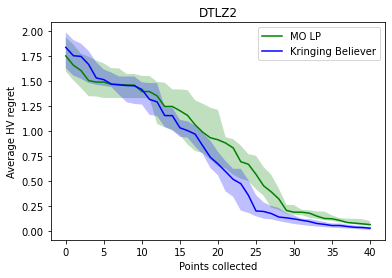

MO LP avg time per optimization: 65.7273s
KB avg time per optimization: 193.0555s


In [28]:
mo_lp_hv_regret = np.loadtxt("results/DistanceBased_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")
kb_hv_regret = np.loadtxt("results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None", delimiter=",")

mo_lp_time = np.loadtxt("results/DistanceBased_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")
kb_time = np.loadtxt("results/KB_DTLZ2_n_initial_points_3_n_query_points_4_n_optimization_steps_10_n_repeats_10_seed_None_time", delimiter=",")

n_query_points = 4
n_optimization_steps = 10

x = range(n_query_points * n_optimization_steps + 1)

plt.fill_between(x, np.quantile(mo_lp_hv_regret, q=0.25, axis=0), np.quantile(mo_lp_hv_regret, q=0.75, axis=0), facecolor='g', alpha=0.25)
plt.fill_between(x, np.quantile(kb_hv_regret, q=0.25, axis=0), np.quantile(kb_hv_regret, q=0.75, axis=0), facecolor='b', alpha=0.25)
plt.plot(x, np.median(mo_lp_hv_regret, axis=0), c='g', label='MO LP')
plt.plot(x, np.median(kb_hv_regret, axis=0), c='b', label='Kringing Believer')
plt.title("DTLZ2")
plt.xlabel("Points collected")
plt.ylabel("Average HV regret")
plt.legend()
plt.show()

print(f"MO LP avg time per optimization: {np.mean(mo_lp_time):.4f}s")
print(f"KB avg time per optimization: {np.mean(kb_time):.4f}s")